## **Handwritten Digit Recognition Project**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing  import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


minst = fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


The "fetch_openml" function here is used download the mnist_784 data set

In [ ]:
minst.data.shape

(70000, 784)

**Let's define a function to see the number of Photos in Mnist dataset**

In [ ]:
def showimg(dframe,index):
  some_digit = dframe.to_numpy()[index]
  some_digit_img = some_digit.reshape(28,28)

  plt.imshow(some_digit_img,cmap='binary')
  plt.axis('off')
  plt.show()

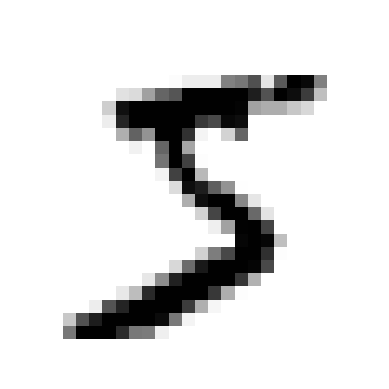

In [ ]:
showimg(minst.data,0)

**Split Data-> Training Set and Testing Set**

In [ ]:
train_img, test_img, train_lbl, test_lbl = train_test_split(minst.data,minst.target, test_size=1/7)

In [ ]:
type(train_img)

pandas.core.frame.DataFrame

In [ ]:
test_img_copy = test_img.copy()

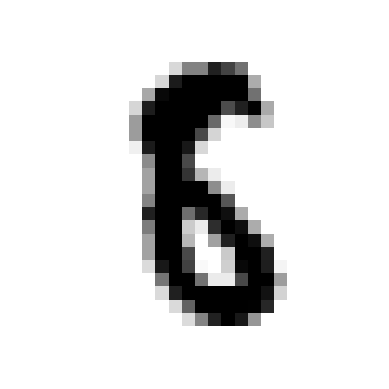

In [ ]:
showimg(test_img_copy,2)

**Scaling our Data**

In [ ]:
scaler = StandardScaler()

scaler.fit(train_img)

train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

PCA Algorithm

In [ ]:
pca_model=PCA(.95) # The variance is protected by 95%

In [ ]:
pca_model.fit(train_img)

PCA(n_components=0.95)

In [ ]:
#Let's Check how many dimensions it can reduce from 784 dimensions
print(pca_model.n_components_)

330


In [ ]:
#Let's reduce the size of both train and test datasets from 784 to 329
train_img = pca_model.transform(train_img)
test_img = pca_model.transform(test_img)

**Logistic Regression**

In [ ]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)

In [ ]:
model.fit(train_img,train_lbl)

LogisticRegression(max_iter=10000)

In [ ]:
model.predict(test_img[0].reshape(1,-1))

array(['6'], dtype=object)

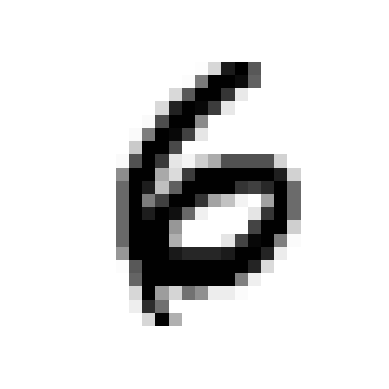

In [ ]:
showimg(test_img_copy,0)

In [ ]:
model.predict(test_img[42].reshape(1,-1))

array(['3'], dtype=object)

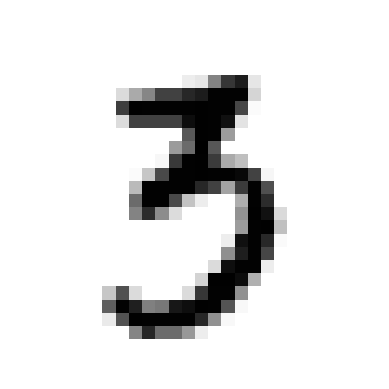

In [ ]:
showimg(test_img_copy,42)

In [ ]:
model.predict(test_img[100].reshape(1,-1))

array(['1'], dtype=object)

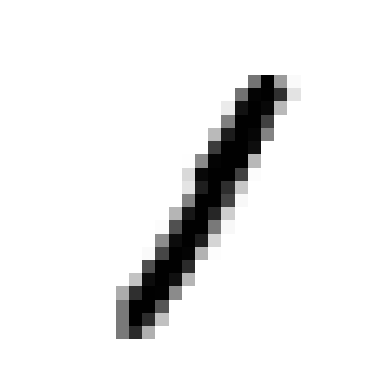

In [ ]:
showimg(test_img_copy,100)

**Measuring the accuracy of Our Model**

In [ ]:
model.score(test_img,test_lbl)

0.9241

**The Conclusion**
In this project, we have brought together two different machine learning models inorder to solve a real world problem in recognising handwritten digits. The main purpose of using PCA here is to reduce the dimension thereby also reduces the training time of the model. Most importantly I have aimed to protect 95% variance.